## Import Libraries

In [181]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [184]:
df = pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/Tuwaiqpro/Usecase-7/final_data.csv")

In [186]:
df.shape

(10754, 22)

In [188]:
df.drop_duplicates(inplace=True)

In [190]:
df.head(10)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
9,/luke-shaw/profil/spieler/183288,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,...,0.000000,0.000000,5854,443,70,4,35000000,42000000,2,1


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [194]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [196]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [198]:
#rename 
df.rename(columns={
    'red cards': 'red_cards',
    'yellow cards': 'yellow_cards',
    'minutes played': 'minutes_played',
    'second yellow cards': 'second_yellow_cards',
    'goals conceded': 'goals_conceded',
    'clean sheets': 'clean_sheets'}, inplace=True)


In [200]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)  


Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow_cards',
       'second_yellow_cards', 'red_cards', 'goals_conceded', 'clean_sheets',
       'minutes_played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'position_encoded', 'winger'],
      dtype='object')


In [202]:
correlation_matrix = df[numeric_columns].corr()  
print(correlation_matrix['current_value'].sort_values(ascending=False))


current_value          1.000000
highest_value          0.834553
minutes_played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
position_encoded       0.085154
height                 0.040535
winger                 0.005034
red_cards             -0.010171
clean_sheets          -0.011684
yellow_cards          -0.011766
second_yellow_cards   -0.013889
age                   -0.050156
goals_conceded        -0.063529
Name: current_value, dtype: float64


In [204]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team']
numeric_features = ['appearance', 'minutes played', 'days_injured','assists','highest_value','award']


In [206]:
df.describe()

,height,age,appearance,goals,assists,yellow_cards,second_yellow_cards,red_cards,goals_conceded,clean_sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


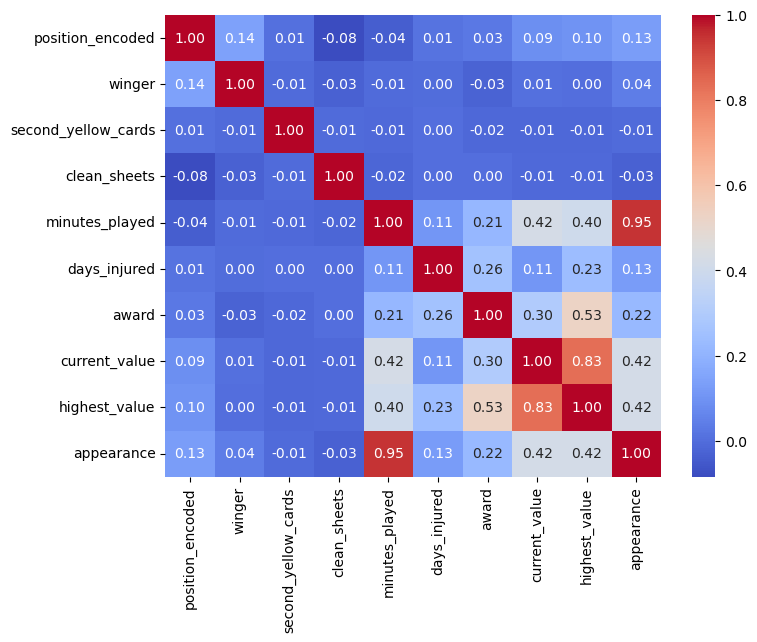

In [208]:
selected_columns = df[['position_encoded', 'winger', 'second_yellow_cards','clean_sheets','minutes_played','days_injured','award',
                      'current_value','highest_value','appearance']]  # the columns I want for corr

correlation_matrix = selected_columns.corr()

#draw heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.show()

In [209]:
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64


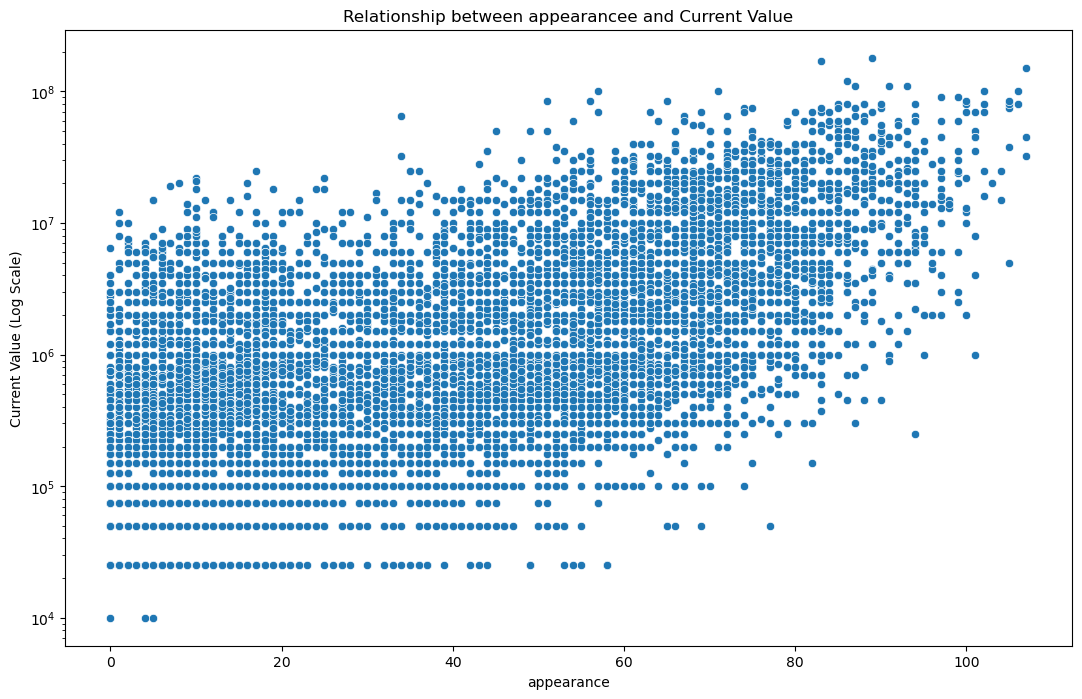

In [210]:
#here is a Positive Correlation
plt.figure(figsize=(13, 8))
sns.scatterplot(x='appearance', y='current_value', data=df)
plt.title('Relationship between appearancee and Current Value')
plt.xlabel('appearance')
plt.ylabel('Current Value (Log Scale)')
plt.yscale('log') 
plt.show()



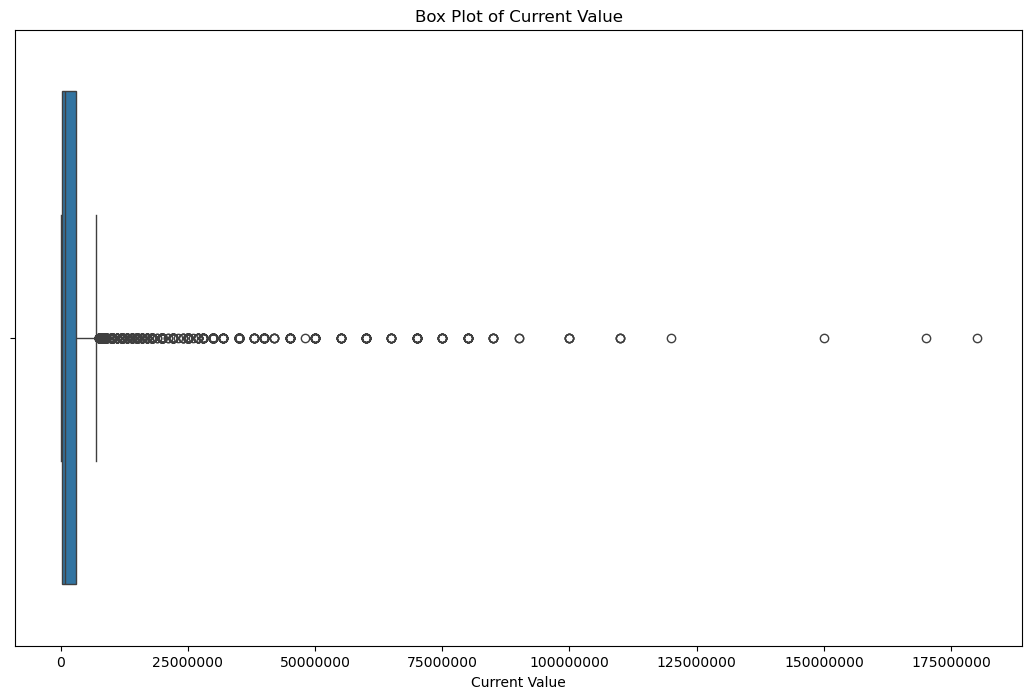

In [211]:

#Box Plot
plt.figure(figsize=(13, 8))
sns.boxplot(x=df['current_value'])
plt.xscale('linear') 
plt.ticklabel_format(style='plain', axis='x') 
plt.title('Box Plot of Current Value')
plt.xlabel('Current Value')
plt.show()


Text(0.5, 1.0, 'Distribution after Removing Outliers')

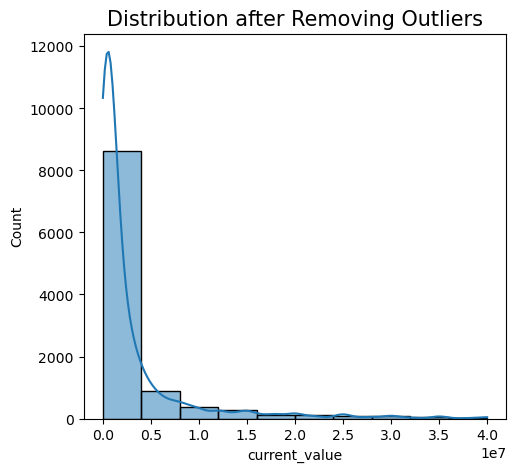

In [214]:
from scipy import stats as st

# Calculate Z-scores for 'Current Value'
zw = st.zscore(df['current_value'])

# Identify outliers based on Z-score 
df = df[np.abs(zw) <= 4]  

# Plot distributions
plt.figure(figsize=(12, 5))

# Before removing outliers
plt.subplot(1, 2, 1)
sns.histplot(df['current_value'], kde=True, bins=10)  # Use histplot 
plt.title('Distribution after Removing Outliers', fontsize=15)


In [215]:
df.shape

(10636, 22)

In [216]:
max_appearance = df['appearance'].max()
print({max_appearance})

{107}


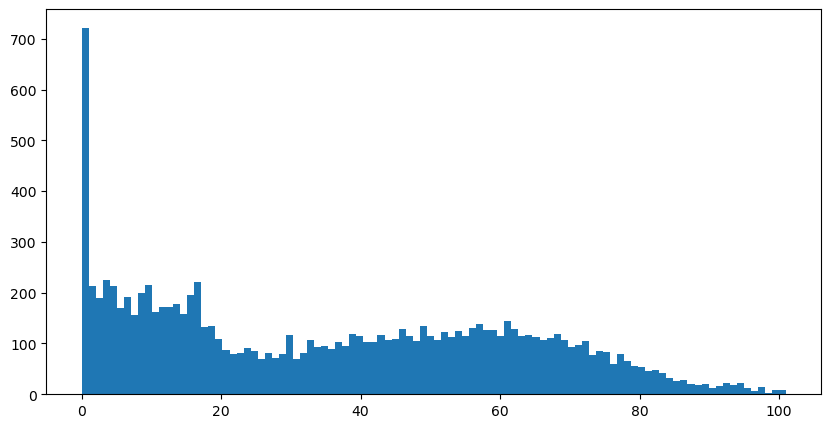

In [217]:
plt.figure(figsize=(10,5))
plt.hist(df[df['appearance']<=101]['appearance'], bins=100);

In [219]:
df = df[df['appearance']<=89]

In [221]:
df.shape

(10483, 22)

In [225]:
print(df.columns)


Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow_cards', 'second_yellow_cards', 'red_cards',
       'goals_conceded', 'clean_sheets', 'minutes_played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')


In [230]:

selected_columns = ['current_value', 'highest_value', 'appearance', 'minutes_played','team']  
df = df[selected_columns]
print(df.shape)


(10483, 5)


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [234]:
df.head(2)

,current_value,highest_value,appearance,minutes_played,team
1,1500000,22000000,15,1304,Manchester United
2,600000,6000000,4,292,Manchester United


In [236]:
categorical_features

['team']

In [238]:
print(df.columns)


Index(['current_value', 'highest_value', 'appearance', 'minutes_played',
       'team'],
      dtype='object')


In [240]:
#one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [242]:
print(df.columns)

Index(['current_value', 'highest_value', 'appearance', 'minutes_played',
       'team_1.FC Köln', 'team_1.FC Union Berlin', 'team_1.FSV Mainz 05',
       'team_AA Argentinos Juniors', 'team_AC Ajaccio', 'team_AC Milan',
       ...
       'team_West Ham United', 'team_Western Sydney Wanderers',
       'team_Western United FC', 'team_Wigan Athletic', 'team_Wolfsberger AC',
       'team_Wolverhampton Wanderers', 'team_Yokohama F. Marinos',
       'team_Yokohama FC', 'team_Zenit St. Petersburg', 'team_Ümraniyespor'],
      dtype='object', length=378)


In [244]:
df.shape

(10483, 378)

In [246]:
df.head(2)

,current_value,highest_value,appearance,minutes_played,team_1.FC Köln,team_1.FC Union Berlin,team_1.FSV Mainz 05,team_AA Argentinos Juniors,team_AC Ajaccio,team_AC Milan,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
1,1500000,22000000,15,1304,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,600000,6000000,4,292,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 3. Feature selection

In [249]:
df = df[['highest_value', 'appearance', 'minutes_played']]

#### 4. Prepare train and test data

In [252]:
# Prepare data
X = df


# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [254]:
X.shape

(10483, 3)

In [289]:

p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_value(value):
     if value < p35:
        return 'Cheap_Price'
    elif value < p75:
        return 'Good_Price'
    else:
        return 'High_Price'


df['price_category'] = df['current_value'].apply(categorize_value)
df.drop('current_value', axis=1, inplace=True)



# Apply the function to create a new column
print(df['price_category'].value_counts())



IndentationError: unindent does not match any outer indentation level (<string>, line 8)

## Buliding the Model

In [259]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 2

In [261]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_scaled)
#indices

In [263]:
distances[:,min_samples-1]

array([0.20903933, 0.02040477, 0.33569845, ..., 0.0077485 , 0.02296051,
       0.03391035])

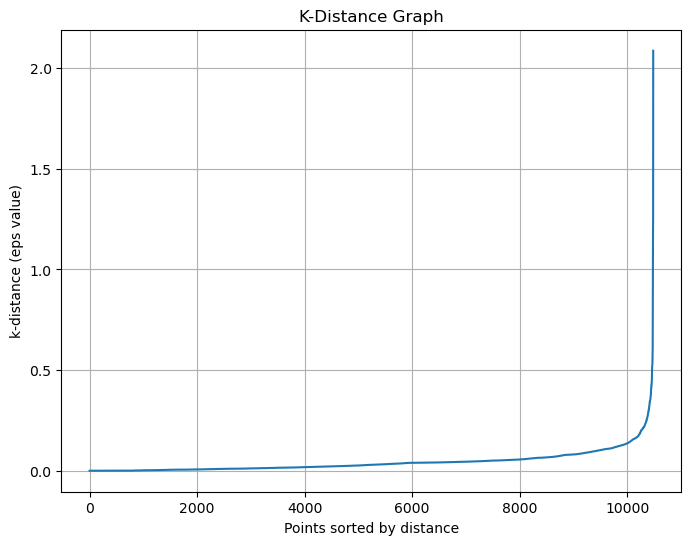

In [265]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()


## Train the Model

In [272]:
from sklearn.cluster import DBSCAN 

dbscan_model = DBSCAN()
# Fit the model on the training data
clusters = dbscan_model.fit_predict(X_scaled)


In [274]:
pd.Series(clusters).value_counts()

 0    10364
-1       65
 3       33
 2       12
 1        9
Name: count, dtype: int64

## Evaluating the Model

In [277]:
silhouette_avg = silhouette_score(X, clusters)
silhouette_avg

0.8261157265112518

In [278]:
X.head(2)


,highest_value,appearance,minutes_played
1,22000000,15,1304
2,6000000,4,292


NameError: name 'chosen_eps' is not defined

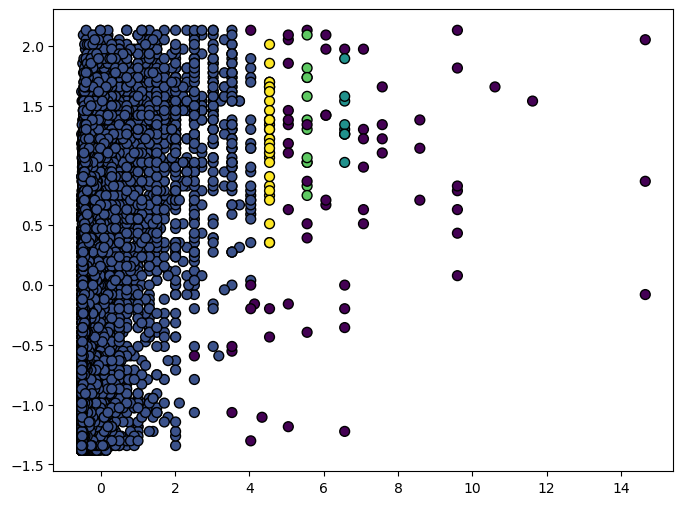

In [281]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [291]:
X['dbscan'] = clusters

In [293]:
X['dbscan'].value_counts()

dbscan
 0    10364
-1       65
 3       33
 2       12
 1        9
Name: count, dtype: int64

<Axes: xlabel='highest_value', ylabel='appearance'>

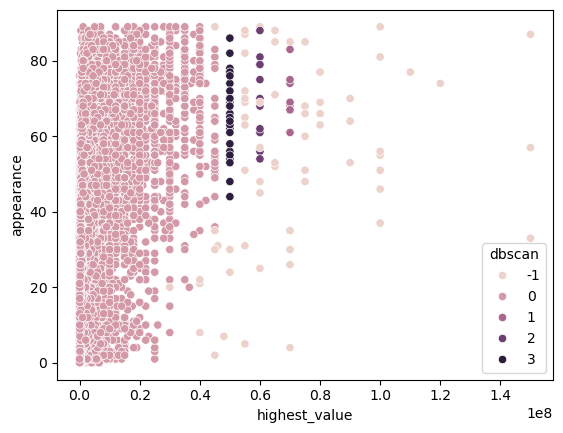

In [295]:
sns.scatterplot(data = X , x = 'highest_value', y = 'appearance', hue = 'dbscan')



<Axes: xlabel='minutes_played', ylabel='appearance'>

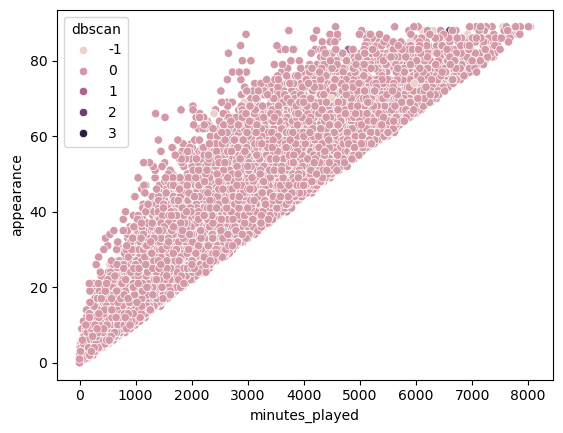

In [296]:
sns.scatterplot(data = X , x = 'minutes_played', y = 'appearance', hue = 'dbscan')
